# Homework1
## Cancer Diagnosis Using Machine Learning
## Harshil Patel (306646748)

Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make sure to provide proper descriptions as MarkDown for each section of your code.
In this homework, we again work with a real dataset from UCI Dataset.

a- Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame:
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv") Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign tumor). You will use all 9 features in this homework.

In [1]:
import pandas as pd # import package panda and save as pd

Cancer_df = pd.read_csv('https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv') # reading a CSV file directly from Local device, and save as df

Cancer_df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


b- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [2]:
# Creating Feature Matrix
feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']


A = Cancer_df[feature_cols]
    
print(A.shape)

f = Cancer_df['Malignant_Cancer'] 
print(f)

(150, 9)
0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    1
147    1
148    0
149    0
Name: Malignant_Cancer, Length: 150, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split

A_train,A_test,f_train,f_test = train_test_split (A, f, test_size=0.3, random_state=2) #split the data basis on

c- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). Then, calculate and report the accuracy and AUC of your classifier. Later in part (g), you will plot the ROC curve as well. Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [4]:
# import DecisionTreeClassifier.

from sklearn.tree import DecisionTreeClassifier 

my_DecisionTree = DecisionTreeClassifier(random_state=2) 
my_DecisionTree.fit(A_train, f_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [5]:
f_predict = my_DecisionTree.predict(A_test)

print(f_predict)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


In [6]:
# import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score 

dt_accuracy = accuracy_score(f_test, f_predict)

print(dt_accuracy)

0.8666666666666667


In [0]:
#predict Binary model
predict_dt = my_DecisionTree.predict(A_test) 
predict_prob_dt = my_DecisionTree.predict_proba(A_test) 

In [8]:
from sklearn import metrics

dt_fpr, dt_tpr, thresholds = metrics.roc_curve(f_test, predict_prob_dt[:,1], pos_label=1)
print("False Positive Rate")
print(dt_fpr)

print("True Positive Rate")
print(dt_tpr)

print("Area Under the Curve (AUC)")
DecisionTree_AUC = metrics.auc(dt_fpr, dt_tpr)
print(DecisionTree_AUC)

False Positive Rate
[0.         0.11764706 1.        ]
True Positive Rate
[0.         0.85714286 1.        ]
Area Under the Curve (AUC)
0.8697478991596639


d- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.

Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0...18. In each iteration of the loop, you have to:
- make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size
of bootstarp_size = 0.8*(Size of the original dataset). You can use the following command to generate a random bootstrap dataset (“i" is the variable of the loop, so the random_state changes in each iteration):
resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
- Define and train a new base decision tree classifier on this dataset in each iteration:
Base_DecisionTree = DecisionTreeClassifier(random_state=2).
- Test “this base classifier” on the original “Testing” Dataset build in part(b), and save the prediction results for all testing samples.


Then, Perform Voting to make the final decision on each data sample based on the votes of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging method.

NOTE: You need to calculate the probability of “malignant cancer” to be able to find AUC and plot the ROC curve. As mentioned in the class, you can consider the average (mean) of the votes as the probability for each sample.

In [9]:
from sklearn.utils import resample

bootstrap_size = int(0.8*len(A_train))
prediction = []
result = []

for i in range(0,29):
    a_bag, f_bag = resample(A_train, f_train, n_samples = bootstrap_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(a_bag, f_bag)
    prediction.append(Base_DecisionTree.predict(A_test))
    result.append(Base_DecisionTree.predict_proba(A_test))
prediction

[array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 0,

In [10]:
votes = prediction[28]
for i in range(0,18):
    votes = votes + prediction[i]
predictions = []
for i in range(votes.size):
    if(votes[i] >= 10):
        predictions.append(1)
    else:
        predictions.append(0)
bagging_accuracy = accuracy_score(f_test,predictions)
print(bagging_accuracy)

0.9111111111111111


In [11]:
proba = result[28]
for i in range(28):
    proba += result[i]
for i in range(len(proba)):
    proba[i] = proba[i]/29
    
bagging_fpr, bagging_tpr, thresholds = metrics.roc_curve(f_test, proba[:,1], pos_label=1)
print("False Positive Rate")
print(bagging_fpr)

print("True Positive Rate")
print(bagging_tpr)

print("Area Under the Curve (AUC)")
Bagging_AUC = metrics.auc(bagging_fpr, bagging_tpr)
print(Bagging_AUC)

False Positive Rate
[0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.11764706 0.11764706 0.11764706 0.11764706 0.17647059 0.29411765
 1.        ]
True Positive Rate
[0.         0.39285714 0.53571429 0.57142857 0.64285714 0.75
 0.78571429 0.85714286 0.92857143 0.96428571 1.         1.
 1.        ]
Area Under the Curve (AUC)
0.9380252100840336


e- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(A_train, f_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=29, random_state=2)

In [13]:
f_predict = my_AdaBoost.predict(A_test)
print(f_predict)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [14]:
adaboost_accuracy = accuracy_score(f_test, f_predict)
print(adaboost_accuracy)

0.9555555555555556


In [0]:
#predict Binary model
predict_adaboost = my_AdaBoost.predict(A_test) 
predict_prob_adaboost = my_AdaBoost.predict_proba(A_test) 

In [16]:
from sklearn import metrics

adab_fpr, adab_tpr, thresholds = metrics.roc_curve(f_test, predict_prob_adaboost[:,1], pos_label=1)
print("False Positive Rate")
print(adab_fpr)

print("True Positive Rate")
print(adab_tpr)

print("Area Under the Curve (AUC)")
Adaboost_AUC = metrics.auc(adab_fpr, adab_tpr)
print(Adaboost_AUC)

False Positive Rate
[0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.05882353 0.11764706 0.11764706 0.35294118
 0.52941176 1.        ]
True Positive Rate
[0.         0.03571429 0.10714286 0.21428571 0.25       0.35714286
 0.42857143 0.46428571 0.96428571 0.96428571 1.         1.
 1.         1.        ]
Area Under the Curve (AUC)
0.9653361344537815


f- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. This algorithm is not included in sklearn, so you need to install the XGBoost library. Please see this for more infor: https://xgboost.readthedocs.io/en/latest/build.html
Mac users can easily install it with “pip install xgboost”.
Repeat part (e) with XGBoost. Use this command to import and define your classifier:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [17]:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(A_train, f_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=29, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
XGBooat_accuracy = accuracy_score(f_test, f_predict)
print(XGBooat_accuracy)

0.9555555555555556


In [19]:
#predict Binary model
predict_xgboost = my_XGBoost.predict(A_test) 
predict_prob_xgboost = my_XGBoost.predict_proba(A_test) 

predict_xgboost = my_XGBoost.predict(A_test)
print(predict_xgboost)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [20]:
from sklearn import metrics

xgb_fpr, xgb_tpr, thresholds = metrics.roc_curve(f_test, predict_prob_xgboost[:,1], pos_label=1)
print("False Positive Rate")
print(xgb_fpr)

print("True Positive Rate")
print(xgb_tpr)

print("Area Under the Curve (AUC)")
XGBoost_AUC = metrics.auc(xgb_fpr, xgb_tpr)
print(XGBoost_AUC)

False Positive Rate
[0.         0.         0.         0.         0.05882353 0.05882353
 0.05882353 0.05882353 0.11764706 0.11764706 0.23529412 0.41176471
 0.52941176 1.        ]
True Positive Rate
[0.         0.17857143 0.25       0.35714286 0.42857143 0.5
 0.64285714 0.96428571 0.96428571 1.         1.         1.
 1.         1.        ]
Area Under the Curve (AUC)
0.9621848739495799


g- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =
RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(A_train, f_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [22]:
f_predict = my_RandomForest.predict(A_test)
print(f_predict)

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [23]:
RandomForest_accuracy = accuracy_score(f_test, f_predict)
print(RandomForest_accuracy)

0.9555555555555556


In [24]:
#predict Binary model
predict_rf = my_RandomForest.predict(A_test) 
predict_prob_rf = my_RandomForest.predict_proba(A_test) 

predict_rf = my_RandomForest.predict(A_test)
print(predict_rf)

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [25]:
from sklearn import metrics

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(f_test, predict_prob_rf[:,1], pos_label=1)
print("False Positive Rate")
print(rf_fpr)

print("True Positive Rate")
print(rf_tpr)

print("Area Under the Curve (AUC)")
RandomForest_AUC = metrics.auc(rf_fpr, rf_tpr)
print(RandomForest_AUC)

False Positive Rate
[0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.29411765 1.        ]
True Positive Rate
[0.         0.35714286 0.60714286 0.67857143 0.71428571 0.92857143
 1.         1.         1.        ]
Area Under the Curve (AUC)
0.9516806722689075


h- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

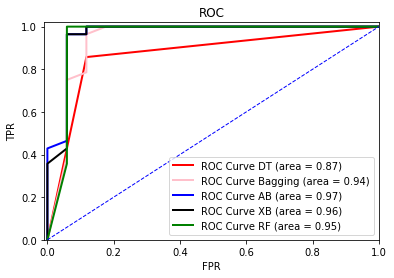

In [26]:
# Import matplotlib.pyplot as plot to generate graphs and plot curves
import matplotlib.pyplot as plot 
%matplotlib inline  
plot.figure()

plot.plot(dt_fpr, dt_tpr, color='red', lw=2, label='ROC Curve DT (area = %0.2f)' % DecisionTree_AUC)
plot.plot(bagging_fpr, bagging_tpr, color='pink', lw=2, label='ROC Curve Bagging (area = %0.2f)' % Bagging_AUC)
plot.plot(adab_fpr, adab_tpr, color='blue', lw=2, label='ROC Curve AB (area = %0.2f)' % Adaboost_AUC)
plot.plot(xgb_fpr, xgb_tpr, color='black', lw=2, label='ROC Curve XB (area = %0.2f)' % XGBoost_AUC)
plot.plot(rf_fpr, rf_tpr, color='green', lw=2, label='ROC Curve RF (area = %0.2f)' % RandomForest_AUC)

plot.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range 
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.02])

plot.xlabel('FPR')
plot.ylabel('TPR')
plot.title('ROC')
plot.legend(loc="lower right")

plot.show()

In [27]:
print("AUC of Decision Tree = ",DecisionTree_AUC)
print("AUC of Bagging = ",Bagging_AUC)
print("AUC of Adaboost = ",Adaboost_AUC)
print("AUC of XGBosst = ",XGBoost_AUC)
print("AUC of Random Forest = ",RandomForest_AUC)

AUC of Decision Tree =  0.8697478991596639
AUC of Bagging =  0.9380252100840336
AUC of Adaboost =  0.9653361344537815
AUC of XGBosst =  0.9621848739495799
AUC of Random Forest =  0.9516806722689075


In [28]:
print("Accuracy of Decision Tree =",dt_accuracy)
print("Accuracy of Bagging",bagging_accuracy)
print("Accuracy of AdaBoost =",adaboost_accuracy)
print("Accuracy of XGBoost =",XGBooat_accuracy)
print("Accuracy of Random Forest =",RandomForest_accuracy)

Accuracy of Decision Tree = 0.8666666666666667
Accuracy of Bagging 0.9111111111111111
Accuracy of AdaBoost = 0.9555555555555556
Accuracy of XGBoost = 0.9555555555555556
Accuracy of Random Forest = 0.9555555555555556


- Which algorithm is the best w.r.t the AUC value?

AdaBoost

- Which algorithm is the best w.r.t the Accuracy value?

AdaBoost, XGBoost, Random Forest

- Which algorithm is the best when we want a False Positive Rate of %7?

Random Forest